**Importação das bibliotecas necessárias**

In [2]:
import numpy as np # Para operações numéricas
import pandas as pd # Para manipulação de dados em DataFrame(tabela)
import seaborn as sns # Para visualização de dados estatísticos
import matplotlib.pyplot as plt # Para criação de gráficos
import statsmodels.api as sm # para modelos estatísticos (como regressão)
from scipy import stats # Para funçẽs estatísticas, incluindo testes de normalidade (Shapiro-Wilk)

**Buscando a base de dados**

In [3]:
dados = pd.read_csv('propaganda (2).csv')

**Verificando dimensões do DataFrame**

In [4]:
dados.shape

(200, 4)

**Visualização das 5 primeiras linhas**

In [5]:
dados.head(10)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


**Tipos das variáveis**

In [6]:
dados.dtypes

TV        float64
Radio     float64
Jornal    float64
Vendas    float64
dtype: object

**Verificação de valores ausentes e nulos**

In [7]:
dados.isnull().sum()

TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64

### 1 - Análise descritiva

retorna contagem, média, desvio padrão, mínimo, quartis e máximo.

In [8]:
dados.describe()

,TV,Radio,Jornal,Vendas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### 2 - Cálculo de correlação e covariância

**Correlação**

Correlação:
              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.782224
Radio   0.054809  1.000000  0.354104  0.576223
Jornal  0.056648  0.354104  1.000000  0.228299
Vendas  0.782224  0.576223  0.228299  1.000000


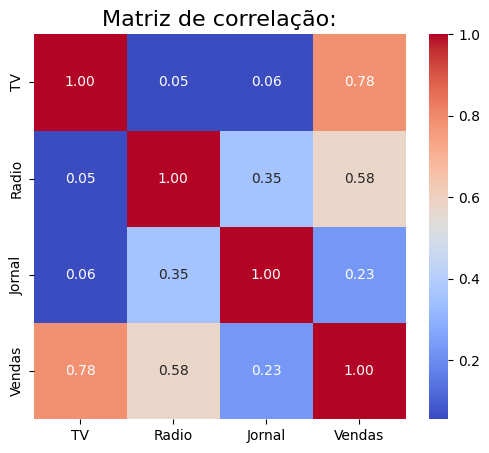

In [34]:
# Calcula a matriz de correlação
correlation = dados.corr()

# Exibe o coeficiente de correlação
print(f"Correlação:\n{correlation}")

# Cria um heatmap para visualizar a matriz de correlação
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlação:", fontsize=16)
plt.show()

**Interpretação da Correlação**

**Tv x Vendas**:
- O coeficiente de relação tem valor próximo de + 0.8, uma correlação forte positiva, indicando que apresentações visuais tendem a ser mais efetivas para propagandas e vendas.
 
**Radio x Vendas**:
- O coeficiente de relação tem valor próximo de +0.5, uma correlação moderada positiva. O investimento em Rádio acompanha o crescimento das Vendas de forma consistente, mas com uma força menor em comparação à TV.
 
**Jornal x Vendas**:
- O coeficiente de relação tem valor próximo de +0.2, uma correlação baixa/fraca positiva. Isso indica que o Jornal tem um retorno mais baixo em relação as outras formas.

**Covariância**

In [10]:
cov = dados.cov()
# Exibe o coeficiente de correlação
print(f"Covariância:\n{cov}")

Covariância:
                 TV       Radio      Jornal      Vendas
TV      7370.949893   69.862492  105.919452  350.390195
Radio     69.862492  220.427743  114.496979   44.635688
Jornal   105.919452  114.496979  474.308326   25.941392
Vendas   350.390195   44.635688   25.941392   27.221853


**Interpretação da Covariância**

Confirmando a análise da correlação acima, Vendas e TV tendem a se mover juntas na mesma direção devido ao número positivo e alto. Radio mantém um valor neutro porém positivo, enquanto Jornal segue em positivo fraco.

### 3 - Modelo de regressão

In [37]:
limpeza_coluna_x = ['Vendas']

colunas_x = dados.columns.drop(limpeza_coluna_x)
colunas_y = dados['Vendas']

x = dados[colunas_x]
y = dados['Vendas'] # Variável dependente (Vendas)

# Ajustando o modelo de regressão linear
modelo = sm.OLS(y, sm.add_constant(x)).fit()

# Sumário do modelo
modelo_summary = modelo.summary

### 4 - Análise de resíduos

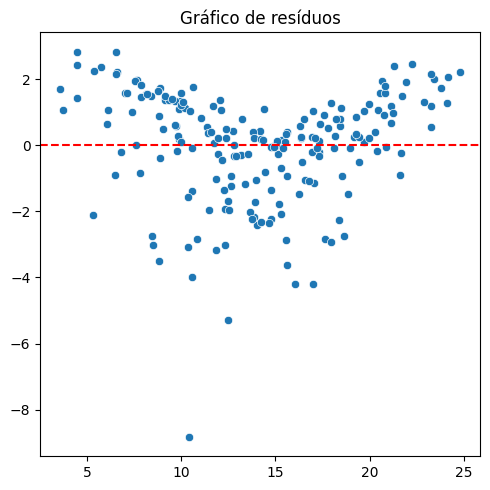

In [30]:
residuo = modelo.resid

# gráfico
plt.figure(figsize=(5,5))
plt.subplot(1, 1, 1)
sns.scatterplot(x=modelo.fittedvalues, y=residuo)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de resíduos')
plt.xlabel('') # Título do eixo X
plt.ylabel('') # Título do eixo Y

plt.tight_layout()
plt.show()

**Análise gráfica**

Existe uma dispersão despadronizada no gráfico, indicando homocedasticidade. 

### 5 – Análise de multicolinearidade

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Obter a lista de nomes das colunas (incluindo a constante)
colunas = x.columns

# 2. Criar um DataFrame para armazenar os resultados do VIF
vif_data = pd.DataFrame()
vif_data["feature"] = colunas

# 3. Calcular o VIF para cada variável
# É necessário calcular o VIF para cada coluna (i) no DataFrame X_cons
vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                    for i in range(len(colunas))]

# 4. Exibir o resultado, ordenando do maior para o menor
vif_data.sort_values(by='VIF', ascending=False, inplace=True)

print("--- Análise de Multicolinearidade (VIF) ---")
print(vif_data)

--- Análise de Multicolinearidade (VIF) ---
  feature       VIF
1   Radio  3.285462
2  Jornal  3.055245
0      TV  2.486772


Todos os valores de VIF ficaram abaixo de 4, conclui-se então que o modelo é estável e confiável.

### 6 - Análise do modelo

In [40]:
print(str(modelo.summary()))

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 14 Nov 2025   Prob (F-statistic):           1.58e-96
Time:                        23:53:54   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

 **Teste T**

Visto que o modelo retornou p - valor < 0.05 para as variáveis TV e Radio, elas são consideradas significativas, enquanto que para o Jornal 0.859, não tenho impacto significativo das vendas.

 **Teste F**

O modelo retornou um valor < 0.05 de 1.58e-96, conclui-se que o modelo é significativo.

 **R² ajustado**
 
O valor do R² ajustado é de 0.896 ou 89,6% de variação total nas Vendas, indicativo de que o modelo de regressão múltipla, utilizando TV, Rádio e Jornal, é capaz de explicar 89,6% dessa variação nas Vendas.